In [59]:
#  packages
pacman::p_load(pacman, dplyr, callr, lintr, GGally, ggplot2, ggthemes, tidyverse, ggvis, httr, lubridate, plotly, rio, rmarkdown, shiny, olsrr, zoo, PerformanceAnalytics, corrplot, stringr, tidyr, caTools, forecast, cowplot, rgl, ggstatsplot, relaimpo, ggcorrplot)

In [60]:
# set path
path <- getwd()
setwd(path)

In [61]:
# import dataframe
df_developed_raw <- read.csv("./data/developed.csv", header = TRUE)
df_developed <- df_developed_raw[, 3:9] # slicing [row, col], starting with 1

df_developing_raw <- read.csv("./data/developing.csv")
df_developing <- df_developing_raw[, 3:9]

df_all_raw <- read.csv("./data/all.csv")
df_all <- df_all_raw[, 3:9]

head(df_developed)
head(df_developing)
head(df_all)

,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,21.96351,5.149410,4.028510,43.92701,-0.6052462
2,NA,NA,22.09764,5.170025,4.056082,44.19528,-0.6187635
3,NA,NA,22.13074,5.184171,4.025054,44.26148,-0.6187635
4,NA,NA,22.02466,5.191312,3.850038,44.04932,-0.6604477
5,NA,NA,21.96162,5.191230,3.968937,43.92324,-0.6604477
6,NA,NA,22.01226,5.182835,4.074026,44.02452,-0.7113519


,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,19.28778,22.66507,3.701973,4.562411,45.33013,0.4918874
2,NA,19.05562,23.00032,3.726912,4.326436,46.00063,0.8191629
3,NA,17.64489,23.03672,3.749594,4.197479,46.07344,1.4349655
4,NA,17.84278,23.24226,3.773564,4.068161,46.48453,1.9080599
5,NA,19.06660,23.48686,3.801030,3.970184,46.97371,2.1279698
6,NA,17.77008,23.60275,3.832461,3.811645,47.20550,2.4936847


,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,19.28778,22.66507,3.701973,4.562411,45.33013,0.4918874
2,NA,19.05562,23.00032,3.726912,4.326436,46.00063,0.8191629
3,NA,17.64489,23.03672,3.749594,4.197479,46.07344,1.4349655
4,NA,17.84278,23.24226,3.773564,4.068161,46.48453,1.9080599
5,NA,19.06660,23.48686,3.801030,3.970184,46.97371,2.1279698
6,NA,17.77008,23.60275,3.832461,3.811645,47.20550,2.4936847


In [62]:
# descriptive statistics
summary(df_developed)
# summary(df_developing)
# summary(df_all)


str(df_developed)
# str(df_developing)
# str(df_all)

     lnGGGI            lnFDI           lnGDP            lnPD       
 Min.   :-0.4868   Min.   :17.33   Min.   :21.07   Min.   :0.9911  
 1st Qu.:-0.3628   1st Qu.:21.98   1st Qu.:24.72   1st Qu.:3.5201  
 Median :-0.3105   Median :23.33   Median :26.47   Median :4.7485  
 Mean   :-0.3105   Mean   :23.25   Mean   :26.26   Mean   :4.5999  
 3rd Qu.:-0.2604   3rd Qu.:24.57   3rd Qu.:27.87   3rd Qu.:5.5074  
 Max.   :-0.1143   Max.   :27.32   Max.   :30.69   Max.   :8.9829  
 NA's   :30        NA's   :88                                      
      lnTO           lnGDP2          lnCO2        
 Min.   :3.155   Min.   :42.15   Min.   :-0.7729  
 1st Qu.:4.131   1st Qu.:49.45   1st Qu.: 2.9442  
 Median :4.476   Median :52.95   Median : 3.9568  
 Mean   :4.563   Mean   :52.52   Mean   : 4.1582  
 3rd Qu.:4.980   3rd Qu.:55.73   3rd Qu.: 5.7988  
 Max.   :6.081   Max.   :61.39   Max.   : 8.7211  
 NA's   :10                      NA's   :15       

'data.frame':	540 obs. of  7 variables:
 $ lnGGGI: num  NA NA NA NA NA NA NA NA NA NA ...
 $ lnFDI : num  NA NA NA NA NA NA NA NA NA NA ...
 $ lnGDP : num  22 22.1 22.1 22 22 ...
 $ lnPD  : num  5.15 5.17 5.18 5.19 5.19 ...
 $ lnTO  : num  4.03 4.06 4.03 3.85 3.97 ...
 $ lnGDP2: num  43.9 44.2 44.3 44 43.9 ...
 $ lnCO2 : num  -0.605 -0.619 -0.619 -0.66 -0.66 ...


In [63]:
# check null values
head(is.na(df_developed))
df_developed <- na.omit(df_developed) # remove null values

head(is.na(df_developing))
df_developing <- na.omit(df_developing) # remove null values

head(is.na(df_all))
df_all <- na.omit(df_all) # remove null values


lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [64]:
round(cor(df_developed), 1)
round(cor(df_developing), 1)
round(cor(df_all), 1)

,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
lnGGGI,1.0,0.0,0.0,-0.5,-0.1,0.0,-0.1
lnFDI,0.0,1.0,0.6,0.2,-0.2,0.6,0.6
lnGDP,0.0,0.6,1.0,0.0,-0.7,1.0,1.0
lnPD,-0.5,0.2,0.0,1.0,0.5,0.0,0.0
lnTO,-0.1,-0.2,-0.7,0.5,1.0,-0.7,-0.7
lnGDP2,0.0,0.6,1.0,0.0,-0.7,1.0,1.0
lnCO2,-0.1,0.6,1.0,0.0,-0.7,1.0,1.0


,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
lnGGGI,1.0,0.0,-0.1,0.0,0.1,-0.1,-0.1
lnFDI,0.0,1.0,0.8,0.0,-0.1,0.8,0.8
lnGDP,-0.1,0.8,1.0,0.1,-0.4,1.0,0.9
lnPD,0.0,0.0,0.1,1.0,-0.1,0.1,0.0
lnTO,0.1,-0.1,-0.4,-0.1,1.0,-0.4,-0.2
lnGDP2,-0.1,0.8,1.0,0.1,-0.4,1.0,0.9
lnCO2,-0.1,0.8,0.9,0.0,-0.2,0.9,1.0


,lnGGGI,lnFDI,lnGDP,lnPD,lnTO,lnGDP2,lnCO2
lnGGGI,1.0,0.2,0.1,-0.1,0.1,0.1,0.0
lnFDI,0.2,1.0,0.8,0.1,0.0,0.8,0.8
lnGDP,0.1,0.8,1.0,0.1,-0.3,1.0,0.9
lnPD,-0.1,0.1,0.1,1.0,0.2,0.1,0.1
lnTO,0.1,0.0,-0.3,0.2,1.0,-0.3,-0.2
lnGDP2,0.1,0.8,1.0,0.1,-0.3,1.0,0.9
lnCO2,0.0,0.8,0.9,0.1,-0.2,0.9,1.0


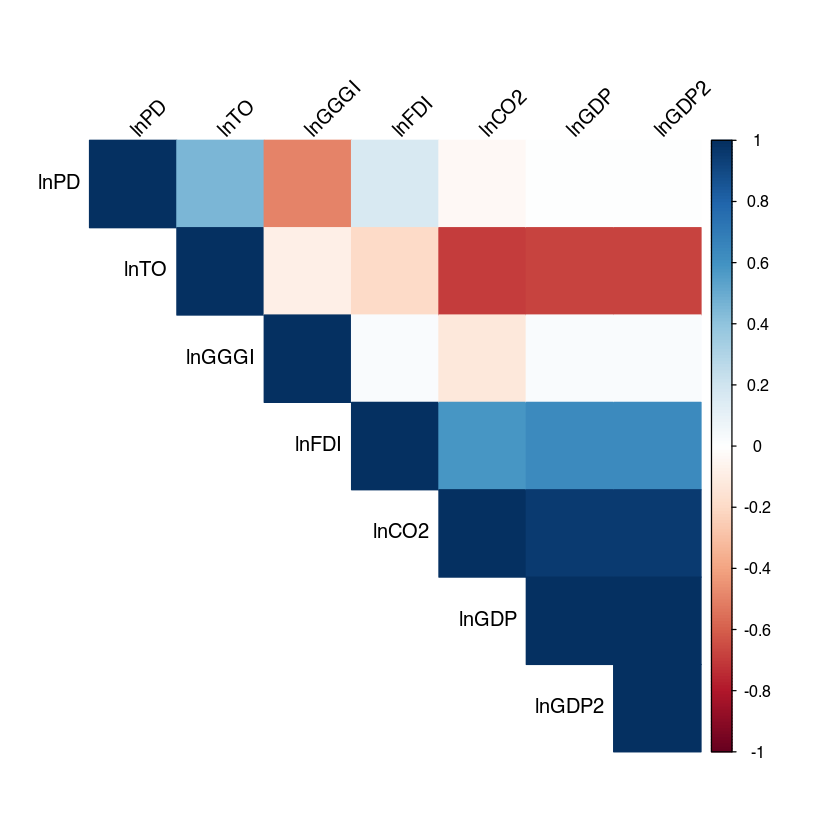

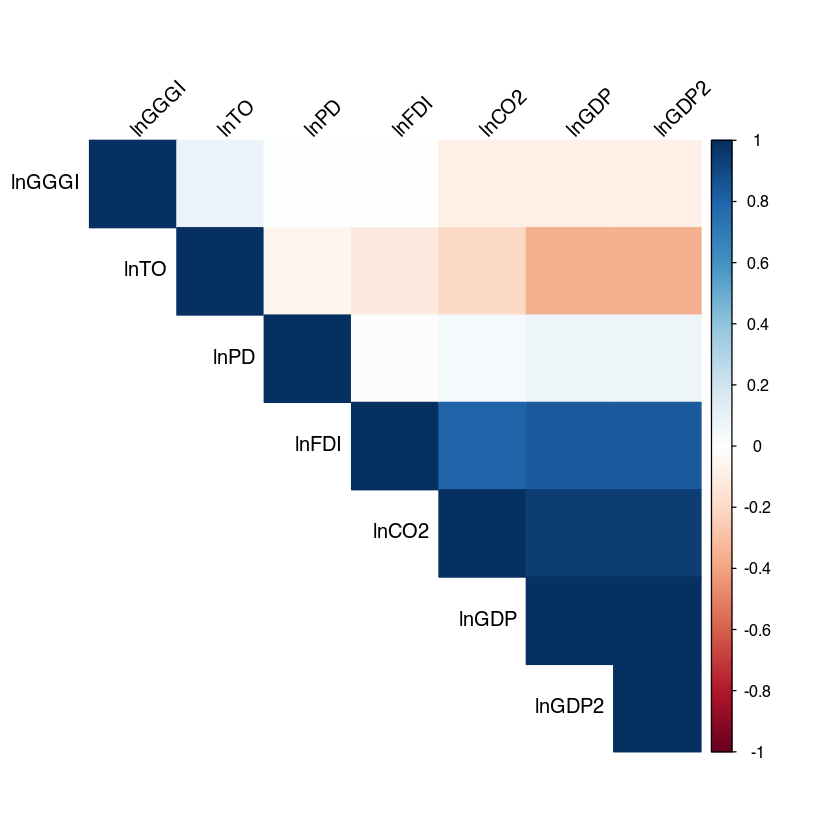

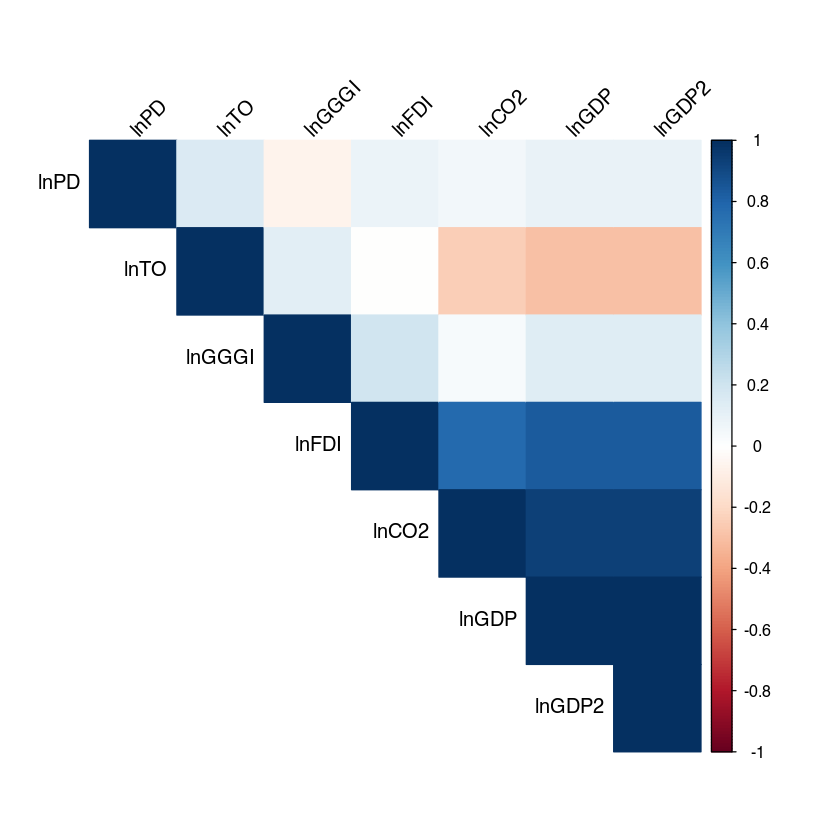

In [65]:
# corr heatmap
corrplot(cor(df_developed), method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)
corrplot(cor(df_developing), method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)
corrplot(cor(df_all), method = "color", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)

ERROR: Error in grid.newpage(): could not open file './images/corrplot_developed.png'


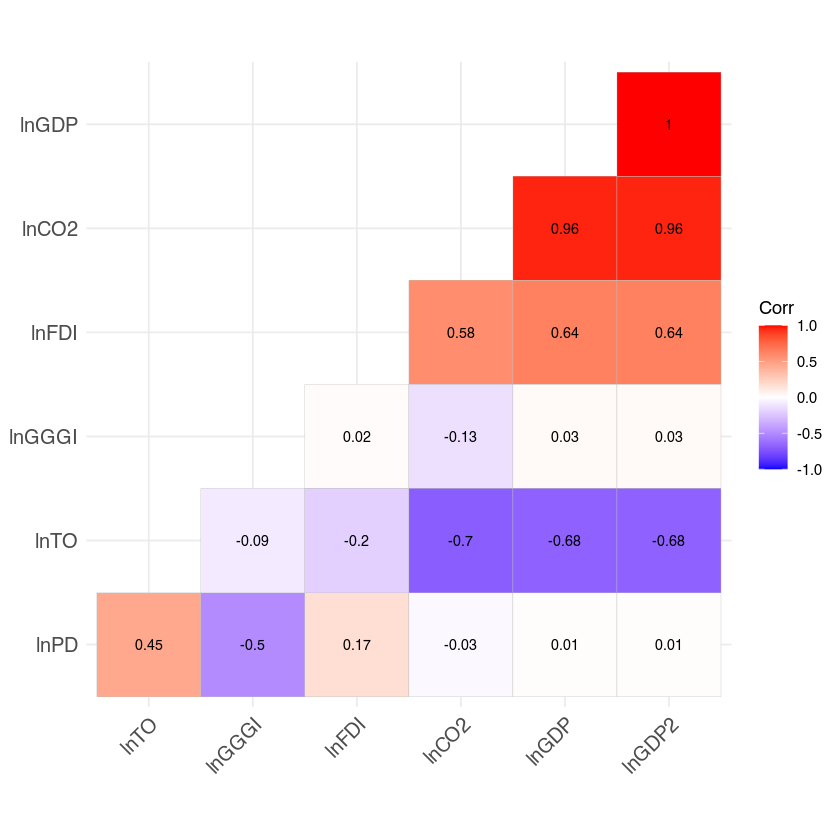

In [66]:
# correlation map with ggplot2
ggcorrplot(cor(df_developed), hc.order = TRUE, type = "lower", lab = TRUE, lab_size = 3)
# ggsave("./images/corrplot_developed.png", width = 10, height = 10) # save plot
ggcorrplot(cor(df_developing), hc.order = TRUE, type = "lower", lab = TRUE, lab_size = 3)
ggcorrplot(cor(df_all), hc.order = TRUE, type = "lower", lab = TRUE, lab_size = 3)


In [ ]:
# compute correlation matrix
correlation_matrix <- round(cor(df_developed),1)
corrp.mat <- cor_pmat(df_developed)

ggcorrplot(correlation_matrix, method="square", hc.order = TRUE, lab = TRUE, lab_size = 3, type = "lower")``

In [ ]:
# linear regression for developed countries
model_developed <- lm(lnCO2~., data = df_developed)
summary(model_developed)

# linear regression for developing countries
model_developing <- lm(lnCO2~., data = df_developing)
summary(model_developing)

# linear regression for all countries
model_all <- lm(lnCO2~., data = df_all)
summary(model_all)